# Exploratory Data Analysis (EDA) of Point-to-point and NBFT data

***



## Introduction


In this notebook an exploratory data analysis of the data related to the point to point latencies and the latencies of the Non-Blocking Fat Trees (NBFT) for the different communication channels.\
The data have been collected on the EPYC partition of the ORFEO cluster. Each node of the partition consist in two sockets having AMD EPYC 7H12 processors with 64 cores each.\
The communication channels have been schematized as follows:

0.  `cache` channel (`0`): in the AMD EPYC 7H12 processors each group of 4 cores share a 16MB L3 cache. The communication between cores of the same Core Complex (CCX) is faster than the communication between cores of different CCXs.
1.  `core` channel (`1`): the communication between cores of the same socket, which is on average slower than the communication between cores of the same CCX.
2.  `socket` channel (`2`): the communication between cores of different sockets, which is on average slower than the communication between cores of the same socket.
3.  `node` channel (`3`): the communication between processes allocated on different nodes.



***

## Imports & Datasets

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
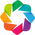

In [1]:
# Load modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import math as m
import os
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

# Current working directory
cwd = os.getcwd()

# Input datasets
nbft_file = os.path.join(cwd, '../datasets/nbft.csv')
nbft_reduce_file = os.path.join(cwd, '../datasets/nbft_reduce.csv')
p2p_file = os.path.join(cwd, '../datasets/p2p.csv')

# Load datasets
nbft_df = pd.read_csv(nbft_file)            # Dataframe for T_NBFT(P,m)
p2p_df = pd.read_csv(p2p_file)              # Dataframe for T_p2p(m)
nbft_reduce_df = pd.read_csv(nbft_reduce_file)  # Dataframe for T_NBFT(P,m) for reduce collective

# Splitted datasets
p2p_cache = p2p_df[p2p_df['mapby']=='cache'].copy()
p2p_core = p2p_df[p2p_df['mapby']=='core'].copy()
p2p_socket = p2p_df[p2p_df['mapby']=='socket'].copy()
p2p_node = p2p_df[p2p_df['mapby']=='node'].copy()
nbft_cache = nbft_df[nbft_df['mapby']=='cache'].copy()
nbft_core = nbft_df[nbft_df['mapby']=='core'].copy()
nbft_socket = nbft_df[nbft_df['mapby']=='socket'].copy()
nbft_node = nbft_df[nbft_df['mapby']=='node'].copy()
nbft_reduce_cache = nbft_reduce_df[nbft_reduce_df['mapby']=='cache'].copy()
nbft_reduce_core = nbft_reduce_df[nbft_reduce_df['mapby']=='core'].copy()
nbft_reduce_socket = nbft_reduce_df[nbft_reduce_df['mapby']=='socket'].copy()
nbft_reduce_node = nbft_reduce_df[nbft_reduce_df['mapby']=='node'].copy()

***

## Point-to-point latencies

### Latency vs message size interactive plots

In [2]:
# Latency vs distance from the source

sizestop = 2**10

# Create plot
scatter_cache = hv.Scatter(p2p_cache[p2p_cache['size']==sizestop], 'recv', 'latency')
line_cache = hv.Curve(p2p_cache[p2p_cache['size']==sizestop], 'recv', 'latency')

# Connecting cache and core
last_value_cache = p2p_cache[p2p_cache['size']==sizestop].iloc[-1]
first_value_core = p2p_core[p2p_core['size']==sizestop].iloc[0]
line_connect_cc = hv.Curve([(last_value_cache['recv'], last_value_cache['latency']), 
                           (first_value_core['recv'], first_value_core['latency'])])

scatter_core = hv.Scatter(p2p_core[p2p_core['size']==sizestop], 'recv', 'latency')
line_core = hv.Curve(p2p_core[p2p_core['size']==sizestop], 'recv', 'latency')

# Connecting core and socket
last_value_core = p2p_core[p2p_core['size']==sizestop].iloc[-1]
first_value_socket = p2p_socket[p2p_socket['size']==sizestop].iloc[0]
line_connect_cs = hv.Curve([(last_value_core['recv'], last_value_core['latency']), 
                           (first_value_socket['recv'], first_value_socket['latency'])])

scatter_socket = hv.Scatter(p2p_socket[p2p_socket['size']==sizestop], 'recv', 'latency')
line_socket = hv.Curve(p2p_socket[p2p_socket['size']==sizestop], 'recv', 'latency')

# Create a new column 'recv_shifted' which is 'recv' + 128
p2p_node['recv_shifted'] = p2p_node['recv'] + 128
scatter_node = hv.Scatter(p2p_node[p2p_node['size']==sizestop], 'recv_shifted', 'latency')
line_node = hv.Curve(p2p_node[p2p_node['size']==sizestop], 'recv_shifted', 'latency')

# Connecting socket and node
last_value_socket = p2p_socket[p2p_socket['size']==sizestop].iloc[-1]
first_value_node = p2p_node[p2p_node['size']==sizestop].iloc[0]
line_connect_sn = hv.Curve([(last_value_socket['recv'], last_value_socket['latency']),
                            (first_value_node['recv_shifted'], first_value_node['latency'])])

# Customize plot
scatter_cache = scatter_cache.opts(
    opts.Scatter(color='red', size=5, tools=['hover'], show_grid=True, logx=False),
    opts.Scatter(width=800, height=500, title=f'Point-to-point Latency in different channels vs. Distance from the source (size: {sizestop})',),
    opts.Scatter(xlabel='Receiving core (in order of distance)', ylabel='Latency (us)')
)
line_cache = line_cache.opts(opts.Curve(color='red', line_width=1))

scatter_core = scatter_core.opts(
    opts.Scatter(color='blue', size=5, tools=['hover'], show_grid=True, logx=False),
    opts.Scatter(width=800, height=500, title='Point-to-point Latency in different channels vs. Distance from the source'),
    opts.Scatter(xlabel='Receiving core (in order of distance)', ylabel='Latency (us)')
)
line_core = line_core.opts(opts.Curve(color='blue', line_width=1))

scatter_socket = scatter_socket.opts(
    opts.Scatter(color='orange', size=5, tools=['hover'], show_grid=True, logx=False),
    opts.Scatter(width=800, height=500, title='Point-to-point Latency in different channels vs. Distance from the source'),
    opts.Scatter(xlabel='Receiving core (in order of distance)', ylabel='Latency (us)')
)
line_socket = line_socket.opts(opts.Curve(color='orange', line_width=1))

scatter_node = scatter_node.opts(
    opts.Scatter(color='green', size=5, tools=['hover'], show_grid=True, logx=False),
    opts.Scatter(width=800, height=500, title='Point-to-point Latency in different channels vs. Distance from the source'),
    opts.Scatter(xlabel='Receiving core (in order of distance)', ylabel='Latency (us)')
)
line_node = line_node.opts(opts.Curve(color='green', line_width=1))

line_connect_cc = line_connect_cc.opts(opts.Curve(color='red', line_width=1, line_dash='dashed'))
line_connect_cs = line_connect_cs.opts(opts.Curve(color='blue', line_width=1, line_dash='dashed'))
line_connect_sn = line_connect_sn.opts(opts.Curve(color='orange', line_width=1, line_dash='dashed'))


(scatter_cache * line_cache * line_connect_cc
 * scatter_core * line_core * line_connect_cs
 * scatter_socket * line_socket * line_connect_sn
 * scatter_node * line_node)

:Overlay
   .Scatter.I   :Scatter   [recv]   (latency)
   .Curve.I     :Curve   [recv]   (latency)
   .Curve.II    :Curve   [x]   (y)
   .Scatter.II  :Scatter   [recv]   (latency)
   .Curve.III   :Curve   [recv]   (latency)
   .Curve.IV    :Curve   [x]   (y)
   .Scatter.III :Scatter   [recv]   (latency)
   .Curve.V     :Curve   [recv]   (latency)
   .Curve.VI    :Curve   [x]   (y)
   .Scatter.IV  :Scatter   [recv_shifted]   (latency)
   .Curve.VII   :Curve   [recv_shifted]   (latency)

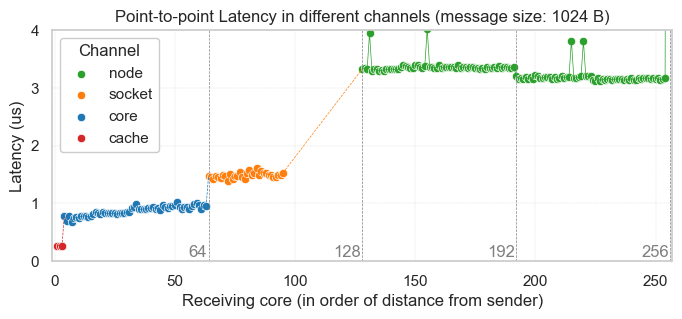

In [4]:
# Latency vs distance from the source (sns)
from http.cookiejar import LWPCookieJar


plt.figure(figsize=(8,3))
sns.set_theme(style="whitegrid", palette="tab10", 
              rc={"grid.linestyle": "--", 
                  "grid.color": "gray", 
                  "grid.alpha": 0.3, 
                  "grid.linewidth": 0.3})

# Add vertical gray line in [64,128,192,256]
plt.axvline(x=64, color='gray', linestyle='--', lw=0.5)
plt.axvline(x=128, color='gray', linestyle='--', lw=0.5)
plt.axvline(x=192, color='gray', linestyle='--', lw=0.5)
plt.axvline(x=256, color='gray', linestyle='--', lw=0.5)

# Add label to the side of each line
plt.text(64-0.5, 0.15, '64', ha='right', va='center', color='gray')
plt.text(128-0.5, 0.15, '128', ha='right', va='center', color='gray')
plt.text(192-0.5, 0.15, '192', ha='right', va='center', color='gray')
plt.text(256-0.5, 0.15, '256', ha='right', va='center', color='gray')

# Plot
# Connecting lines
plt.plot([last_value_cache['recv'], first_value_core['recv']], 
         [last_value_cache['latency'], first_value_core['latency']], 
         color='tab:red', linestyle='--', lw=0.5)
plt.plot([last_value_core['recv'], first_value_socket['recv']],
            [last_value_core['latency'], first_value_socket['latency']],
            color='tab:blue', linestyle='--', lw=0.5)
plt.plot([last_value_socket['recv'], first_value_node['recv_shifted']],
            [last_value_socket['latency'], first_value_node['latency']],
            color='tab:orange', linestyle='--', lw=0.5)


p2p_node['recv_shifted'] = p2p_node['recv'] + 128
sns.scatterplot(data=p2p_node[p2p_node['size']==sizestop], x='recv_shifted', y='latency', label='node', color='tab:green')
sns.lineplot(data=p2p_node[p2p_node['size']==sizestop], x='recv_shifted', y='latency', color='tab:green', lw=0.5)


sns.scatterplot(data=p2p_socket[p2p_socket['size']==sizestop], x='recv', y='latency', label='socket', color='tab:orange')
sns.lineplot(data=p2p_socket[p2p_socket['size']==sizestop], x='recv', y='latency', color='tab:orange', lw=0.5)

sns.scatterplot(data=p2p_core[p2p_core['size']==sizestop], x='recv', y='latency', label='core', color='tab:blue')
sns.lineplot(data=p2p_core[p2p_core['size']==sizestop], x='recv', y='latency', color='tab:blue', lw=0.5)

sns.scatterplot(data=p2p_cache[p2p_cache['size']==sizestop], x='recv', y='latency', label='cache', color='tab:red')
sns.lineplot(data=p2p_cache[p2p_cache['size']==sizestop], x='recv', y='latency', color='tab:red', lw=0.5)

# Customize plot
plt.title(f'Point-to-point Latency in different channels (message size: {sizestop} B)')
plt.xlabel('Receiving core (in order of distance from sender)')
plt.ylabel('Latency (us)')
plt.ylim(0,4)
plt.xlim(-1,257)
plt.legend(title='Channel', loc='upper left', framealpha=1)
# plt.legend(loc = 'upper left', framealpha=1, fontsize=fontsize)
plt.savefig("p2p-channels.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [91]:
# Cache Point-to-point latency

# Create scatter plot
scatter = hv.Scatter(p2p_cache, 'size', 'latency')

# Customize plot
scatter = scatter.opts(
    opts.Scatter(color='red', size=10, tools=['hover'], show_grid=True, logx=False),
    opts.Scatter(width=800, height=500, title='Point-to-point Latency vs. Message size (Shared L3 cache channel)'),
    opts.Scatter(xlabel='Message size (bytes)', ylabel='Latency (us)')
)

scatter

:Scatter   [size]   (latency)

In [92]:
# Core Point-to-point latency

# Create scatter plot
scatter = hv.Scatter(p2p_core, 'size', 'latency')

# Customize plot
scatter = scatter.opts(
    opts.Scatter(color='blue', size=10, tools=['hover'], show_grid=True),
    opts.Scatter(width=800, height=500, title='Point-to-point Latency vs. Message size (Core)'),
    opts.Scatter(xlabel='Message size (bytes)', ylabel='Latency (us)')
)

scatter

:Scatter   [size]   (latency)

In [93]:
# Socket Point-to-point latency

# Create scatter plot
scatter = hv.Scatter(p2p_socket, 'size', 'latency')

# Customize plot
scatter = scatter.opts(
    opts.Scatter(color='orange', size=10, tools=['hover'], show_grid=True),
    opts.Scatter(width=800, height=500, title='Point-to-point Latency vs. Message size (Socket)'),
    opts.Scatter(xlabel='Message size (bytes)', ylabel='Latency (us)')
)

scatter

:Scatter   [size]   (latency)

In [94]:
# Node Point-to-point latency

# Create scatter plot
scatter = hv.Scatter(p2p_node, 'size', 'latency')

# Customize plot
scatter = scatter.opts(
    opts.Scatter(color='green', size=10, tools=['hover'], show_grid=True),
    opts.Scatter(width=800, height=500, title='Point-to-point Latency vs. Message size (Node)'),
    opts.Scatter(xlabel='Message size (bytes)', ylabel='Latency (us)')
)

scatter

:Scatter   [size]   (latency)

### Histograms of point-to-point latencies

In [95]:
# Select message size
sizestop = 2 ** 9

# Select bins
bins = 'auto'

# Define function to create histogram
def create_histogram(df, label, color):
    return hv.Histogram(np.histogram(df, bins=bins), label=label).opts(fill_color=color, fill_alpha=0.4, line_color="black", 
                                                            width=800, height=500, tools=['hover'], show_grid=True, 
                                                            title=f'Histogram for point-to-point communications latencies (Message size: {sizestop} bytes)', 
                                                            xlabel='Latency (us)', ylabel='Frequency')

# Create histograms
hist_core = create_histogram(p2p_df[(p2p_df['mapby']=='core') & (p2p_df['size']==sizestop)]['latency'], 'Core', 'blue')
hist_socket = create_histogram(p2p_df[(p2p_df['mapby']=='socket') & (p2p_df['size']==sizestop)]['latency'], 'Socket', 'orange')
hist_node = create_histogram(p2p_df[(p2p_df['mapby']=='node') & (p2p_df['size']==sizestop)]['latency'], 'Node', 'green')

# Overlay histograms
overlay = (hist_core * hist_socket * hist_node).opts(legend_position='top_left')

overlay

:Overlay
   .Histogram.Core   :Histogram   [x]   (Frequency)
   .Histogram.Socket :Histogram   [x]   (Frequency)
   .Histogram.Node   :Histogram   [x]   (Frequency)

### Linear Fit for Hockney Model: $T_{p2p}^c(m)$


Hockney model for point-to-point communications wants to predict the latency of a communication as a function of the message size. The model is based on the following formula:
$$
T_{p2p}^c(m) = \alpha^c + \beta^c \cdot m
$$
where $T_{p2p}^c(m)$ is the point-to-point latency of the channel $c$ for a message size of size $m$ bytes, $\alpha^c$ is the latency of the communication when the message size is zero and $\beta^c$ is the cost of transferring a byte of data, basically the inverse of the bandwidth of the communication channel.

In [96]:
# cache fit
# Since there are 2 different linear trends for sizes <=2^17 and for sizes >2^17,
# we add a dummy variable with a interaction term to the model
p2p_cache['big'] = (p2p_cache['size'] > 2**17).astype(int)
p2p_cache['big_size'] = p2p_cache['size'] * p2p_cache['big']

# Fit
y = p2p_cache['latency']
X = p2p_cache[['size', 'big', 'big_size']]
X = sm.add_constant(X)
cache_model = sm.OLS(y, X).fit()
alpha, nbft_coefficients, alpha_big, beta_big = cache_model.params 
print(cache_model.summary())

def cache_fit(size):
    if size <= 2**17:
        return alpha + nbft_coefficients * size
    else:
        return (alpha + alpha_big) + (nbft_coefficients + beta_big) * size

x = np.linspace(0, p2p_cache['size'].max(), 100)
y = [cache_fit(size) for size in x]

# Plot of the fitted data and the measured ones
# Create scatter plot
scatter = hv.Scatter(p2p_df[p2p_df['mapby']=='cache'], 'size', 'latency')

# Create line plot
line = hv.Curve((x, y), 'size', 'latency')

# Customize plot
scatter = scatter.opts(
    opts.Scatter(color='red', size=10, tools=['hover'], show_grid=True),
    opts.Scatter(width=800, height=500, title='Point-to-point Latency vs. Message size (Shared L3 cache channel)'),
    opts.Scatter(xlabel='Message size (bytes)', ylabel='Latency (us)')
)

line = line.opts(opts.Curve(color='darkred', line_width=1))

scatter * line

                            OLS Regression Results                            
Dep. Variable:                latency   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.549e+05
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          3.53e-125
Time:                        12:51:45   Log-Likelihood:                -92.806
No. Observations:                  69   AIC:                             193.6
Df Residuals:                      65   BIC:                             202.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2039      0.143      1.430      0.1

:Overlay
   .Scatter.I :Scatter   [size]   (latency)
   .Curve.I   :Curve   [size]   (latency)

In [97]:
# core fit
# Since there are 2 different linear trends for sizes <=2^17 and for sizes >2^17,
# we add a dummy variable with a interaction term to the model
p2p_core['big'] = (p2p_core['size'] > 2**17).astype(int)
p2p_core['big_size'] = p2p_core['size'] * p2p_core['big']

# Fit
y = p2p_core['latency']
X = p2p_core[['size', 'big', 'big_size']]
X = sm.add_constant(X)
core_model = sm.OLS(y, X).fit()
alpha, nbft_coefficients, alpha_big, beta_big = core_model.params 
print(core_model.summary())

def core_fit(size):
    if size <= 2**17:
        return alpha + nbft_coefficients * size
    else:
        return (alpha + alpha_big) + (nbft_coefficients + beta_big) * size

x = np.linspace(0, p2p_core['size'].max(), 100)
y = [core_fit(size) for size in x]

# Plot of the fitted data and the measured ones
# Create scatter plot
scatter = hv.Scatter(p2p_df[p2p_df['mapby']=='core'], 'size', 'latency')

# Create line plot
line = hv.Curve((x, y), 'size', 'latency')

# Customize plot
scatter = scatter.opts(
    opts.Scatter(color='blue', size=10, tools=['hover'], show_grid=True),
    opts.Scatter(width=800, height=500, title='Point-to-point Latency vs. Message size (Core)'),
    opts.Scatter(xlabel='Message size (bytes)', ylabel='Latency (us)')
)

line = line.opts(opts.Curve(color='cyan', line_width=1))

scatter * line

                            OLS Regression Results                            
Dep. Variable:                latency   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.492e+05
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:52:03   Log-Likelihood:                -4524.2
No. Observations:                1380   AIC:                             9056.
Df Residuals:                    1376   BIC:                             9077.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6877      0.214      3.209      0.0

:Overlay
   .Scatter.I :Scatter   [size]   (latency)
   .Curve.I   :Curve   [size]   (latency)

In [98]:
# socket fit
# Since there are 2 different linear trends for sizes <=2^17 and for sizes >2^17,
# we add a dummy variable with a interaction term to the model
p2p_socket['big'] = (p2p_socket['size'] > 2**17).astype(int)
p2p_socket['big_size'] = p2p_socket['size'] * p2p_socket['big']

# Fit
y = p2p_socket['latency']
X = p2p_socket[['size', 'big', 'big_size']]
X = sm.add_constant(X)
socket_model = sm.OLS(y, X).fit()
alpha, nbft_coefficients, alpha_big, beta_big = socket_model.params 
print(socket_model.summary())

def socket_fit(size):
    if size <= 2**17:
        return alpha + nbft_coefficients * size
    else:
        return (alpha + alpha_big) + (nbft_coefficients + beta_big) * size

x = np.linspace(0, p2p_socket['size'].max(), 100)
y = [socket_fit(size) for size in x]

# Plot of the fitted data and the measured ones
# Create scatter plot
scatter = hv.Scatter(p2p_df[p2p_df['mapby']=='socket'], 'size', 'latency')

# Create line plot
line = hv.Curve((x, y), 'size', 'latency')

# Customize plot
scatter = scatter.opts(
    opts.Scatter(color='orange', size=10, tools=['hover'], show_grid=True),
    opts.Scatter(width=800, height=500, title='Point-to-point Latency vs. Message size (Socket)'),
    opts.Scatter(xlabel='Message size (bytes)', ylabel='Latency (us)')
)

line = line.opts(opts.Curve(color='darkorange', line_width=1))

scatter * line


                            OLS Regression Results                            
Dep. Variable:                latency   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.921e+05
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:52:17   Log-Likelihood:                -1874.3
No. Observations:                 736   AIC:                             3757.
Df Residuals:                     732   BIC:                             3775.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0900      0.141      7.711      0.0

:Overlay
   .Scatter.I :Scatter   [size]   (latency)
   .Curve.I   :Curve   [size]   (latency)

In [99]:
# node fit
# Since there are 2 different linear trends for sizes <=2^17 and for sizes >2^17,
# we add a dummy variable with a interaction term to the model
p2p_node['big'] = (p2p_node['size'] > 2**17).astype(int)
p2p_node['big_size'] = p2p_node['size'] * p2p_node['big']

# Fit
y = p2p_node['latency']
X = p2p_node[['size', 'big', 'big_size']]
X = sm.add_constant(X)
node_model = sm.OLS(y, X).fit()
alpha, nbft_coefficients, alpha_big, beta_big = node_model.params 
print(node_model.summary())

def node_fit(size):
    if size <= 2**17:
        return alpha + nbft_coefficients * size
    else:
        return (alpha + alpha_big) + (nbft_coefficients + beta_big) * size

x = np.linspace(0, p2p_node['size'].max(), 100)
y = [node_fit(size) for size in x]

# Plot of the fitted data and the measured ones
# Create scatter plot
scatter = hv.Scatter(p2p_df[p2p_df['mapby']=='node'], 'size', 'latency')

# Create line plot
line = hv.Curve((x, y), 'size', 'latency')

# Customize plot
scatter = scatter.opts(
    opts.Scatter(color='green', size=10, tools=['hover'], show_grid=True),
    opts.Scatter(width=800, height=500, title='Point-to-point Latency vs. Message size (Node)'),
    opts.Scatter(xlabel='Message size (bytes)', ylabel='Latency (us)')
)

line = line.opts(opts.Curve(color='lightgreen', line_width=1))

scatter * line


                            OLS Regression Results                            
Dep. Variable:                latency   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.036e+06
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:52:30   Log-Likelihood:                -4146.1
No. Observations:                2944   AIC:                             8300.
Df Residuals:                    2940   BIC:                             8324.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6845      0.023    118.805      0.0

:Overlay
   .Scatter.I :Scatter   [size]   (latency)
   .Curve.I   :Curve   [size]   (latency)

### Ratios of Delays $Q_{ij}(m)$

Here we estimate the ratio of delays for each couple of channels.\
Formally we numerically identify the channels according to an intrinsic order given by the assumed time of transmission in each channel (*assumption*). In other words we can define the following channels set:
$$
\mathcal{C} = \{ 0 (\text{cache}), 1 (\text{core}), 2 (\text{socket}), 3 (\text{node}) \}
$$
Then the ratio of delays from channel $i$ to channel $j$, where of course $i>j$, is defined as:
$$
Q_{ij}(m) = \frac{T_{p2p}^i(m)}{T_{p2p}^j(m)} \;\;\;, \forall i,j \in \mathcal{C} \; | \; i>j
$$
where $T_{p2p}^i(m)$ and $T_{p2p}^j(m)$ are the latencies of the channels $i$ and $j$ for a message size of size $m$ bytes.

In [31]:
# Hockney fits for all channels

# Dictionary to store hockney model parameters
hockney = {'cache': [], 'core': [], 'socket': [], 'node': []}

# Add dummy variable and interaction term for big sizes
p2p_cache['big'] = (p2p_cache['size'] > 2**17).astype(int)
p2p_cache['big_size'] = p2p_cache['size'] * p2p_cache['big']
p2p_core['big'] = (p2p_core['size'] > 2**17).astype(int)
p2p_core['big_size'] = p2p_core['size'] * p2p_core['big']
p2p_socket['big'] = (p2p_socket['size'] > 2**17).astype(int)
p2p_socket['big_size'] = p2p_socket['size'] * p2p_socket['big']
p2p_node['big'] = (p2p_node['size'] > 2**17).astype(int)
p2p_node['big_size'] = p2p_node['size'] * p2p_node['big']

# Fit -------------------------------------
y = p2p_cache['latency']
X = p2p_cache[['size', 'big', 'big_size']]
X = sm.add_constant(X)
cache_model = sm.OLS(y, X).fit()
hockney['cache'] = list(cache_model.params)

y = p2p_core['latency']
X = p2p_core[['size', 'big', 'big_size']]
X = sm.add_constant(X)
core_model = sm.OLS(y, X).fit()
hockney['core'] = list(core_model.params)

y = p2p_socket['latency']
X = p2p_socket[['size', 'big', 'big_size']]
X = sm.add_constant(X)
socket_model = sm.OLS(y, X).fit()
hockney['socket'] = list(socket_model.params)

y = p2p_node['latency']
X = p2p_node[['size', 'big', 'big_size']]
X = sm.add_constant(X)
node_model = sm.OLS(y, X).fit()
hockney['node'] = list(node_model.params)

# Define a function to compute the p2p latencies
def t_p2p(size, channel):
    alpha, beta, alpha_big, beta_big = hockney[channel]
    if size <= 2**17:
        return alpha + beta * size
    else:
        return (alpha + alpha_big) + (beta + beta_big) * size

# Define a dictionary to numerically identify the channels
C = {'cache': 0, 'core': 1, 'socket': 2, 'node': 3}

# Define a function to compute the ratio od delay between two channels for a given size
def q(size, channel1, channel2):
    # Check which channel is greater according to C
    if C[channel1] < C[channel2]:
        return t_p2p(size, channel2) / t_p2p(size, channel1)
    else:
        return t_p2p(size, channel1) / t_p2p(size, channel2)

# Define a function that always compute a q > 1
def q_pos(size, channel1, channel2):
    q_value = q(size, channel1, channel2)
    if q_value < 1:
        return 1 / q_value
    else:
        return q_value

In [34]:
# Plot the ratio of delays for each couple of channels

# Initialize an empty list to store the plots
plots = []

# Define the possible couples of channels
pairs = [('cache', 'core'), ('cache', 'socket'), ('cache', 'node'), ('core', 'socket'), ('core', 'node'), ('socket', 'node')]

# Select which pair to plot
# pair = pairs[0]

for pair in pairs:
    # x = np.linspace(0, p2p_df['size'].max(), 100)
    x = p2p_df['size'].unique()
    qm = [q(size, pair[0], pair[1]) for size in x]
    qpm = [q_pos(size, pair[0], pair[1]) for size in x]

    # Plot of the fitted data and the measured ones
    scatter = hv.Scatter((x, qm))
    line = hv.Curve((x, qm))
    scatter_pos = hv.Scatter((x, qpm))
    line_pos = hv.Curve((x, qpm))
    lower_bound = hv.Curve((x, [1 for size in x]))

    # Customize plot
    scatter = scatter.opts(
        opts.Scatter(color='blue', size=5, tools=['hover'], show_grid=True, logx=True),
        opts.Scatter(width=800, height=500, title=f'Ratio of delay Q(m) vs. Message size (Channel {pair[0]} vs. Channel {pair[1]})'),
        opts.Scatter(xlabel='Message size (bytes)', ylabel='Ratio of delay Q')
    )
    line = line.opts(opts.Curve(color='blue', line_width=1, logx=True))

    scatter_pos = scatter_pos.opts(
        opts.Scatter(color='red', size=5, tools=['hover'], show_grid=True, logx=True),
        opts.Scatter(width=800, height=500, title=f'Ratio of delay Q(m) vs. Message size (Channel {pair[0]} vs. Channel {pair[1]})'),
        opts.Scatter(xlabel='Message size (bytes)', ylabel='Ratio of delay Q')
    )
    line_pos = line_pos.opts(opts.Curve(color='red', line_width=1, logx=True))

    lower_bound = lower_bound.opts(opts.Curve(color='red', line_width=1, line_dash='dashed'))

    #scatter * line * lower_bound
    # Add the overlay plot to the list
    plots.append(lower_bound * scatter_pos * line_pos * scatter * line)

# Create a layout with the plots
layout = hv.Layout(plots).cols(1)

layout

:Layout
   .Overlay.I   :Overlay
      .Curve.I    :Curve   [x]   (y)
      .Scatter.I  :Scatter   [x]   (y)
      .Curve.II   :Curve   [x]   (y)
      .Scatter.II :Scatter   [x]   (y)
      .Curve.III  :Curve   [x]   (y)
   .Overlay.II  :Overlay
      .Curve.I    :Curve   [x]   (y)
      .Scatter.I  :Scatter   [x]   (y)
      .Curve.II   :Curve   [x]   (y)
      .Scatter.II :Scatter   [x]   (y)
      .Curve.III  :Curve   [x]   (y)
   .Overlay.III :Overlay
      .Curve.I    :Curve   [x]   (y)
      .Scatter.I  :Scatter   [x]   (y)
      .Curve.II   :Curve   [x]   (y)
      .Scatter.II :Scatter   [x]   (y)
      .Curve.III  :Curve   [x]   (y)
   .Overlay.IV  :Overlay
      .Curve.I    :Curve   [x]   (y)
      .Scatter.I  :Scatter   [x]   (y)
      .Curve.II   :Curve   [x]   (y)
      .Scatter.II :Scatter   [x]   (y)
      .Curve.III  :Curve   [x]   (y)
   .Overlay.V   :Overlay
      .Curve.I    :Curve   [x]   (y)
      .Scatter.I  :Scatter   [x]   (y)
      .Curve.II   :Curve   [x]   (y)
      .Scatter.II :Scatter   [x]   (y)
      .Curve.III  :Curve   [x]   (y)
   .Overlay.VI  :Overlay
      .Curve.I    :Curve   [x]   (y)
      .Scatter.I  :Scatter   [x]   (y)
      .Curve.II   :Curve   [x]   (y)
      .Scatter.II :Scatter   [x]   (y)
      .Curve.III  :Curve   [x]   (y)

***

## Non-Blocking Fat Trees (NBFT)

Here we analyze the latencies of the Non-Blocking Fat Trees (NBFT) for the different communication channels.\
Each NBFT consist of a linear broadast tree of $P-1$ communications between the master process (situated in core $0$ of socket $0$ of node $0$) and the other $P-1$ processes distributed in such a way that, for every tree there is only one channel of communication.\
This implies that for every channel:
$$
2 \leq P \leq P^{max(c)}
$$
where $P^{max(c)}$ is the maximum number of processes that can be allocated on the same node for the channel $c$. For the channels we used:

* `cache` channel: $P^{max(0)} = 4$, since there can be at most $3$ cache-to-cache communications.
* `core` channel: $P^{max(1)} = 61$, since there can be at most $60$ core-to-core communications.
* `socket` channel: $P^{max(2)} = 65$, since there can be at most $64$ socket-to-socket communications.
* `node` channel: $P^{max(3)} = 129$, since with $2$ nodes there can be at most $128$ node-to-node communications. However for this measurement I allocated $3$ nodes, so the measured data go up to $P^{max(3)} = 257$.

### NBFT Latency vs number of processes interactive plots

In [36]:
# Cache NBFT latency

# Select a size
sizestop = 2**0

# Create scatter plot
scatter = hv.Scatter(nbft_cache[nbft_cache['size']==sizestop], 'comm', 'latency')
line = hv.Curve(nbft_cache[nbft_cache['size']==sizestop], 'comm', 'latency')

# Customize plot
scatter = scatter.opts(
    opts.Scatter(color='red', size=5, tools=['hover'], show_grid=True, logx=False),
    opts.Scatter(width=800, height=500, title=f'NBFT latency for different number of communications (Shared L3 cache channel, size: {sizestop} bytes)'),
    opts.Scatter(xlabel='Nuber of communications', ylabel='Latency (us)')
)
line = line.opts(opts.Curve(color='red', line_width=1))

scatter * line

:Overlay
   .Scatter.I :Scatter   [comm]   (latency)
   .Curve.I   :Curve   [comm]   (latency)

In [18]:
# Core NBFT latency

sizestop = 2**0

# Create scatter plot
scatter = hv.Scatter(nbft_core[nbft_core['size']==sizestop], 'comm', 'latency')
line = hv.Curve(nbft_core[nbft_core['size']==sizestop], 'comm', 'latency')

# Customize plot
scatter = scatter.opts(
    opts.Scatter(color='blue', size=5, tools=['hover'], show_grid=True, logx=False),
    opts.Scatter(width=800, height=500, title=f'NBFT latency for different number of communications (Core channel, size: {sizestop})'),
    opts.Scatter(xlabel='Nuber of communications', ylabel='Latency (us)')
)
line = line.opts(opts.Curve(color='blue', line_width=1))

scatter * line

:Overlay
   .Scatter.I :Scatter   [comm]   (latency)
   .Curve.I   :Curve   [comm]   (latency)

In [19]:
# Socket NBFT latency

sizestop = 2**0

# Create scatter plot
scatter = hv.Scatter(nbft_socket[nbft_socket['size']==sizestop], 'comm', 'latency')
line = hv.Curve(nbft_socket[nbft_socket['size']==sizestop], 'comm', 'latency')

# Customize plot
scatter = scatter.opts(
    opts.Scatter(color='orange', size=5, tools=['hover'], show_grid=True, logx=False),
    opts.Scatter(width=800, height=500, title=f'NBFT latency for different number of communications (Socket channel, size: {sizestop})'),
    opts.Scatter(xlabel='Nuber of communications', ylabel='Latency (us)')
)
line = line.opts(opts.Curve(color='orange', line_width=1))

scatter * line

:Overlay
   .Scatter.I :Scatter   [comm]   (latency)
   .Curve.I   :Curve   [comm]   (latency)

In [37]:
# Node NBFT latency

sizestop = 2**1

# Create scatter plot
scatter = hv.Scatter(nbft_node[nbft_node['size']==sizestop], 'comm', 'latency')
line = hv.Curve(nbft_node[nbft_node['size']==sizestop], 'comm', 'latency')

# Customize plot
scatter = scatter.opts(
    opts.Scatter(color='green', size=5, tools=['hover'], show_grid=True, logx=False),
    opts.Scatter(width=800, height=500, title=f'NBFT latency for different number of communications (Node channel, size {sizestop} bytes)'),
    opts.Scatter(xlabel='Nuber of communications', ylabel='Latency (us)')
)
line = line.opts(opts.Curve(color='green', line_width=1))

scatter * line

:Overlay
   .Scatter.I :Scatter   [p]   (latency)
   .Curve.I   :Curve   [p]   (latency)

### Linear Fit for $T_{NBFT}^c(P)$

Similarly to what has been done for point-to-point communications, here we're trying to linearly fit the dependence of the latency of the NBFT on the number of processes $P$, or better on the total number of communications ($P-1$).\
The idea is to build, for every message size $m$, a linear model of the form:

$$
T_{NBFT}^{c,m}(P) = \alpha^{c,m} + \beta^{c,m} \cdot (P-1)
$$

where $T_{NBFT}^{c,m}(P)$ is the latency of the NBFT that uses the channel $c$ to transmit a message of size $m$ to $P$ processes, $\alpha^{c,m}$ is the latency of the communication when the number of processes is zero and $\beta^{c,m}$ is the cost in the latency of a NBFT due to the addition of one process to the communication in the same channel $c$.
The fit are repeated separately for each size and for all channels with the exception of the cache channel since that one can have a maximum of $4$ processes involved in any case so can be handled manually.\
This function will then be used to estimate the latency of the NBFT for a generic number of processes $P$.

In [38]:

# Dictionary to store all the fit coefficients: for every channel, for every message size
nbft_coefficients = {'cache': {}, 'core': {}, 'socket': {}, 'node': {}}

# Fit -------------------------------------

# Core
sizes = nbft_core['size'].unique()
for size in sizes:
    y = nbft_core[nbft_core['size']==size]['latency']
    X = nbft_core[nbft_core['size']==size][['p']]
    X = sm.add_constant(X)
    core_model = sm.OLS(y, X).fit()
    nbft_coefficients['core'][size] = list(core_model.params)

# Socket
sizes = nbft_socket['size'].unique()
for size in sizes:
    y = nbft_socket[nbft_socket['size']==size]['latency']
    X = nbft_socket[nbft_socket['size']==size][['p']]
    X = sm.add_constant(X)
    socket_model = sm.OLS(y, X).fit()
    nbft_coefficients['socket'][size] = list(socket_model.params)

# Node
sizes = nbft_node['size'].unique()
for size in sizes:
    y = nbft_node[nbft_node['size']==size]['latency']
    X = nbft_node[nbft_node['size']==size][['p']]
    X = sm.add_constant(X)
    node_model = sm.OLS(y, X).fit()
    nbft_coefficients['node'][size] = list(node_model.params)

# Define a function to compute the NBFT latencies
def t_nbft(p, size, channel):
    alpha, beta = nbft_coefficients[channel][size]
    return alpha + beta * p

In [55]:
# Core NBFT latency vs fit

# Select a size
sizestop = 2**10

# Generate the fitted data
x = nbft_core[nbft_core['size']==sizestop]['p']
y = [t_nbft(p, sizestop, 'core') for p in x]

# Create scatter plot
scatter = hv.Scatter(nbft_core[nbft_core['size']==sizestop], 'p', 'latency')
line = hv.Curve(nbft_core[nbft_core['size']==sizestop], 'p', 'latency')
fit_line = hv.Curve((x, y), 'p', 'latency')

# Customize plot
scatter = scatter.opts(
    opts.Scatter(color='blue', size=5, tools=['hover'], show_grid=True, logx=False),
    opts.Scatter(width=800, height=500, title=f'NBFT latency for different number of processes (Core channel, size: {sizestop})'),
    opts.Scatter(xlabel='Nuber of processes', ylabel='Latency (us)')
)
line = line.opts(opts.Curve(color='blue', line_width=1))
fit_line = fit_line.opts(opts.Curve(color='red', line_width=2))

scatter * line * fit_line

:Overlay
   .Scatter.I :Scatter   [p]   (latency)
   .Curve.I   :Curve   [p]   (latency)
   .Curve.II  :Curve   [p]   (latency)

In [56]:
# Socket NBFT latency

# Select a size
sizestop = 2**4

# Generate the fitted data
x = nbft_socket[nbft_socket['size']==sizestop]['p']
y = [t_nbft(p, sizestop, 'socket') for p in x]

# Create scatter plot
scatter = hv.Scatter(nbft_socket[nbft_socket['size']==sizestop], 'p', 'latency')
line = hv.Curve(nbft_socket[nbft_socket['size']==sizestop], 'p', 'latency')
fit_line = hv.Curve((x, y), 'p', 'latency')

# Customize plot
scatter = scatter.opts(
    opts.Scatter(color='orange', size=5, tools=['hover'], show_grid=True, logx=False),
    opts.Scatter(width=800, height=500, title=f'NBFT latency for different number of processes (Socket channel, size: {sizestop})'),
    opts.Scatter(xlabel='Nuber of processes', ylabel='Latency (us)')
)
line = line.opts(opts.Curve(color='orange', line_width=1))
fit_line = fit_line.opts(opts.Curve(color='red', line_width=2))

scatter * line * fit_line

:Overlay
   .Scatter.I :Scatter   [p]   (latency)
   .Curve.I   :Curve   [p]   (latency)
   .Curve.II  :Curve   [p]   (latency)

In [60]:
# Node NBFT latency

# Select a size
sizestop = 2**15

# Generate the fitted data
x = nbft_node[nbft_node['size']==sizestop]['p']
y = [t_nbft(p, sizestop, 'node') for p in x]

# Create scatter plot
scatter = hv.Scatter(nbft_node[nbft_node['size']==sizestop], 'p', 'latency')
line = hv.Curve(nbft_node[nbft_node['size']==sizestop], 'p', 'latency')
fit_line = hv.Curve((x, y), 'p', 'latency')

# Customize plot
scatter = scatter.opts(
    opts.Scatter(color='green', size=5, tools=['hover'], show_grid=True, logx=False),
    opts.Scatter(width=800, height=500, title=f'NBFT latency for different number of processes (Node channel, size {sizestop} bytes)'),
    opts.Scatter(xlabel='Nuber of processes', ylabel='Latency (us)')
)
line = line.opts(opts.Curve(color='green', line_width=1))
fit_line = fit_line.opts(opts.Curve(color='red', line_width=2))

scatter * line * fit_line

:Overlay
   .Scatter.I :Scatter   [p]   (latency)
   .Curve.I   :Curve   [p]   (latency)
   .Curve.II  :Curve   [p]   (latency)

### Parallelization factor $\gamma^{c}(P,m)$

Since the latency of any NBFT using a given channel $c$ can be bounded by:
$$
T_{p2p}^c(m) \leq T_{NBFT}^c(P,m) \leq (P-1) \cdot T_{p2p}^c(m) = T_{BFT}^c(P,m)
$$
we can model the latency of a generic NBFT for $P$ processes and a message size of $m$ bytes as:
$$
T_{NBFT}^c(P,m) = \gamma^{c}(P,m) \cdot T_{p2p}^c(m)
$$
where $\gamma^{c}(P,m)$ is the parallelization factor of the NBFT for $P$ processes and a message size of $m$ bytes.\
Here we're estimating the parallelization factor using the fitted times for the NBFT and the point-to-point latencies as:
$$
\gamma^{c}(P,m) = \frac{T_{NBFT}^c(P,m)}{T_{p2p}^c(m)}
$$

In [76]:
# Fitting p2p latencies and NBFT (the same as above, repeated in case the previous cells were not executed)

# Hockney fits for all channels -------------------------------------

# Dictionary to store hockney model parameters
hockney = {'cache': [], 'core': [], 'socket': [], 'node': []}

# Add dummy variable and interaction term for big sizes
p2p_cache['big'] = (p2p_cache['size'] > 2**17).astype(int)
p2p_cache['big_size'] = p2p_cache['size'] * p2p_cache['big']
p2p_core['big'] = (p2p_core['size'] > 2**17).astype(int)
p2p_core['big_size'] = p2p_core['size'] * p2p_core['big']
p2p_socket['big'] = (p2p_socket['size'] > 2**17).astype(int)
p2p_socket['big_size'] = p2p_socket['size'] * p2p_socket['big']
p2p_node['big'] = (p2p_node['size'] > 2**17).astype(int)
p2p_node['big_size'] = p2p_node['size'] * p2p_node['big']

# Fit
y = p2p_cache['latency']
X = p2p_cache[['size', 'big', 'big_size']]
X = sm.add_constant(X)
cache_model = sm.OLS(y, X).fit()
hockney['cache'] = list(cache_model.params)

y = p2p_core['latency']
X = p2p_core[['size', 'big', 'big_size']]
X = sm.add_constant(X)
core_model = sm.OLS(y, X).fit()
hockney['core'] = list(core_model.params)

y = p2p_socket['latency']
X = p2p_socket[['size', 'big', 'big_size']]
X = sm.add_constant(X)
socket_model = sm.OLS(y, X).fit()
hockney['socket'] = list(socket_model.params)

y = p2p_node['latency']
X = p2p_node[['size', 'big', 'big_size']]
X = sm.add_constant(X)
node_model = sm.OLS(y, X).fit()
hockney['node'] = list(node_model.params)

# NBFT fits for all channels -------------------------------------

# Dictionary to store all the fit coefficients: for every channel, for every message size
nbft_coefficients = {'core': {}, 'socket': {}, 'node': {}}

# Fit

# Core
sizes = nbft_core['size'].unique()
for size in sizes:
    y = nbft_core[nbft_core['size']==size]['latency']
    X = nbft_core[nbft_core['size']==size][['p']]
    X = sm.add_constant(X)
    core_model = sm.OLS(y, X).fit()
    nbft_coefficients['core'][size] = list(core_model.params)

# Socket
sizes = nbft_socket['size'].unique()
for size in sizes:
    y = nbft_socket[nbft_socket['size']==size]['latency']
    X = nbft_socket[nbft_socket['size']==size][['p']]
    X = sm.add_constant(X)
    socket_model = sm.OLS(y, X).fit()
    nbft_coefficients['socket'][size] = list(socket_model.params)

# Node
sizes = nbft_node['size'].unique()
for size in sizes:
    y = nbft_node[nbft_node['size']==size]['latency']
    X = nbft_node[nbft_node['size']==size][['p']]
    X = sm.add_constant(X)
    node_model = sm.OLS(y, X).fit()
    nbft_coefficients['node'][size] = list(node_model.params)

# Functions -------------------------------------

# Define a function to compute the NBFT latencies
def t_nbft(p, size, channel):
    if channel == 'cache':
        return nbft_cache[(nbft_cache['size']==size) & (nbft_cache['p']==p)]['latency'].values[0]
    else:
        alpha, beta = nbft_coefficients[channel][size]
        return alpha + beta * p

# Define a function to compute the p2p latencies
def t_p2p(size, channel):
    alpha, beta, alpha_big, beta_big = hockney[channel]
    if size <= 2**17:
        return alpha + beta * size
    else:
        return (alpha + alpha_big) + (beta + beta_big) * size
    
# Define a function to compute the parallelization factor gamma
def gamma(p, size, channel):
    return t_nbft(p, size, channel) / t_p2p(size, channel)

In [77]:
# Parallelization factor for cache

# Select a size
sizestop = 2**1

# Generate the fitted data
x = nbft_cache[nbft_cache['size']==sizestop]['p']
y = [gamma(p, sizestop, 'cache') for p in x]

# Create scatter plot
scatter = hv.Scatter((x, y), 'p', 'gamma')
line = hv.Curve((x, y), 'p', 'gamma')

# Customize plot
scatter = scatter.opts(
    opts.Scatter(color='red', size=5, tools=['hover'], show_grid=True, logx=False),
    opts.Scatter(width=800, height=500, title=f'Parallelization factor gamma vs. Number of processes (Cache channel, size: {sizestop})'),
    opts.Scatter(xlabel='Nuber of processes', ylabel='Parallelization factor gamma')
)
line = line.opts(opts.Curve(color='red', line_width=1))

scatter * line

:Overlay
   .Scatter.I :Scatter   [p]   (gamma)
   .Curve.I   :Curve   [p]   (gamma)

In [82]:
# Parallelization factor for core

# Select a size
sizestop = 2**0

# Generate the fitted data
x = nbft_core[nbft_core['size']==sizestop]['p']
y = [gamma(p, sizestop, 'core') for p in x]

# Create scatter plot
scatter = hv.Scatter((x, y), 'p', 'gamma')
line = hv.Curve((x, y), 'p', 'gamma')
lower_bound = hv.Curve((x, [1 for p in x]), 'p', 'gamma')
upper_bound = hv.Curve((x, [p-1 for p in x]), 'p', 'gamma')

# Customize plot
scatter = scatter.opts(
    opts.Scatter(color='blue', size=5, tools=['hover'], show_grid=True, logx=False),
    opts.Scatter(width=800, height=500, title=f'Parallelization factor gamma vs. Number of processes (Core channel, size: {sizestop})'),
    opts.Scatter(xlabel='Nuber of processes', ylabel='Parallelization factor gamma')
)
line = line.opts(opts.Curve(color='blue', line_width=1))
lower_bound = lower_bound.opts(opts.Curve(color='red', line_width=1, line_dash='dashed'))
upper_bound = upper_bound.opts(opts.Curve(color='red', line_width=1, line_dash='dashed'))

scatter * line * lower_bound * upper_bound

:Overlay
   .Scatter.I :Scatter   [p]   (gamma)
   .Curve.I   :Curve   [p]   (gamma)
   .Curve.II  :Curve   [p]   (gamma)
   .Curve.III :Curve   [p]   (gamma)

In [85]:
# Parallelization factor for socket

# Select a size
sizestop = 2**12

# Generate the fitted data
x = nbft_socket[nbft_socket['size']==sizestop]['p']
y = [gamma(p, sizestop, 'socket') for p in x]

# Create scatter plot
scatter = hv.Scatter((x, y), 'p', 'gamma')
line = hv.Curve((x, y), 'p', 'gamma')
lower_bound = hv.Curve((x, [1 for p in x]), 'p', 'gamma')
upper_bound = hv.Curve((x, [p-1 for p in x]), 'p', 'gamma')

# Customize plot
scatter = scatter.opts(
    opts.Scatter(color='orange', size=5, tools=['hover'], show_grid=True, logx=False),
    opts.Scatter(width=800, height=500, title=f'Parallelization factor gamma vs. Number of processes (Socket channel, size: {sizestop})'),
    opts.Scatter(xlabel='Nuber of processes', ylabel='Parallelization factor gamma')
)
line = line.opts(opts.Curve(color='orange', line_width=1))
lower_bound = lower_bound.opts(opts.Curve(color='red', line_width=1, line_dash='dashed'))
upper_bound = upper_bound.opts(opts.Curve(color='red', line_width=1, line_dash='dashed'))

scatter * line * lower_bound * upper_bound

:Overlay
   .Scatter.I :Scatter   [p]   (gamma)
   .Curve.I   :Curve   [p]   (gamma)
   .Curve.II  :Curve   [p]   (gamma)
   .Curve.III :Curve   [p]   (gamma)

In [88]:
# Parallelization factor for node

# Select a size
sizestop = 2**6

# Generate the fitted data
x = nbft_node[nbft_node['size']==sizestop]['p']
y = [gamma(p, sizestop, 'node') for p in x]

# Create scatter plot
scatter = hv.Scatter((x, y), 'p', 'gamma')
line = hv.Curve((x, y), 'p', 'gamma')
lower_bound = hv.Curve((x, [1 for p in x]), 'p', 'gamma')
upper_bound = hv.Curve((x, [p-1 for p in x]), 'p', 'gamma')

# Customize plot
scatter = scatter.opts(
    opts.Scatter(color='green', size=5, tools=['hover'], show_grid=True, logx=False),
    opts.Scatter(width=800, height=500, title=f'Parallelization factor gamma vs. Number of processes (Node channel, size: {sizestop})'),
    opts.Scatter(xlabel='Nuber of processes', ylabel='Parallelization factor gamma')
)
line = line.opts(opts.Curve(color='green', line_width=1))
lower_bound = lower_bound.opts(opts.Curve(color='red', line_width=1, line_dash='dashed'))
upper_bound = upper_bound.opts(opts.Curve(color='red', line_width=1, line_dash='dashed'))

scatter * line * lower_bound * upper_bound

:Overlay
   .Scatter.I :Scatter   [p]   (gamma)
   .Curve.I   :Curve   [p]   (gamma)
   .Curve.II  :Curve   [p]   (gamma)
   .Curve.III :Curve   [p]   (gamma)

***

## NBFT Reduce

In [13]:
# Cache NBFT latency

# Select a size
sizestop = 2**0

# Create scatter plot
scatter = hv.Scatter(nbft_reduce_cache[nbft_reduce_cache['size']==sizestop], 'comm', 'latency')
line = hv.Curve(nbft_reduce_cache[nbft_reduce_cache['size']==sizestop], 'comm', 'latency')

# Customize plot
scatter = scatter.opts(
    opts.Scatter(color='red', size=5, tools=['hover'], show_grid=True, logx=False),
    opts.Scatter(width=800, height=500, title=f'NBFT latency for different number of communications (Shared L3 cache channel, size: {sizestop} bytes)'),
    opts.Scatter(xlabel='Nuber of communications', ylabel='Latency (us)')
)
line = line.opts(opts.Curve(color='red', line_width=1))

scatter * line

:Overlay
   .Scatter.I :Scatter   [comm]   (latency)
   .Curve.I   :Curve   [comm]   (latency)

In [4]:
# Core NBFT latency

sizestop = 2**0

# Create scatter plot
scatter = hv.Scatter(nbft_reduce_core[nbft_reduce_core['size']==sizestop], 'comm', 'latency')
line = hv.Curve(nbft_reduce_core[nbft_reduce_core['size']==sizestop], 'comm', 'latency')

# Customize plot
scatter = scatter.opts(
    opts.Scatter(color='blue', size=5, tools=['hover'], show_grid=True, logx=False),
    opts.Scatter(width=800, height=500, title=f'NBFT latency for different number of communications (Core channel, size: {sizestop})'),
    opts.Scatter(xlabel='Nuber of communications', ylabel='Latency (us)')
)
line = line.opts(opts.Curve(color='blue', line_width=1))

scatter * line

:Overlay
   .Scatter.I :Scatter   [comm]   (latency)
   .Curve.I   :Curve   [comm]   (latency)

In [5]:
# Socket NBFT latency

sizestop = 2**0

# Create scatter plot
scatter = hv.Scatter(nbft_reduce_socket[nbft_reduce_socket['size']==sizestop], 'comm', 'latency')
line = hv.Curve(nbft_reduce_socket[nbft_reduce_socket['size']==sizestop], 'comm', 'latency')

# Customize plot
scatter = scatter.opts(
    opts.Scatter(color='orange', size=5, tools=['hover'], show_grid=True, logx=False),
    opts.Scatter(width=800, height=500, title=f'NBFT latency for different number of communications (Socket channel, size: {sizestop})'),
    opts.Scatter(xlabel='Nuber of communications', ylabel='Latency (us)')
)
line = line.opts(opts.Curve(color='orange', line_width=1))

scatter * line

:Overlay
   .Scatter.I :Scatter   [comm]   (latency)
   .Curve.I   :Curve   [comm]   (latency)

In [6]:
# Node NBFT latency

sizestop = 2**1

# Create scatter plot
scatter = hv.Scatter(nbft_reduce_node[nbft_reduce_node['size']==sizestop], 'comm', 'latency')
line = hv.Curve(nbft_reduce_node[nbft_reduce_node['size']==sizestop], 'comm', 'latency')

# Customize plot
scatter = scatter.opts(
    opts.Scatter(color='green', size=5, tools=['hover'], show_grid=True, logx=False),
    opts.Scatter(width=800, height=500, title=f'NBFT latency for different number of communications (Node channel, size {sizestop} bytes)'),
    opts.Scatter(xlabel='Nuber of communications', ylabel='Latency (us)')
)
line = line.opts(opts.Curve(color='green', line_width=1))

scatter * line

:Overlay
   .Scatter.I :Scatter   [comm]   (latency)
   .Curve.I   :Curve   [comm]   (latency)